<a href="https://colab.research.google.com/github/RehabEmam228/Bertlesmann-challenge/blob/master/handwrittendigits_mnist_by_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download =True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [14]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


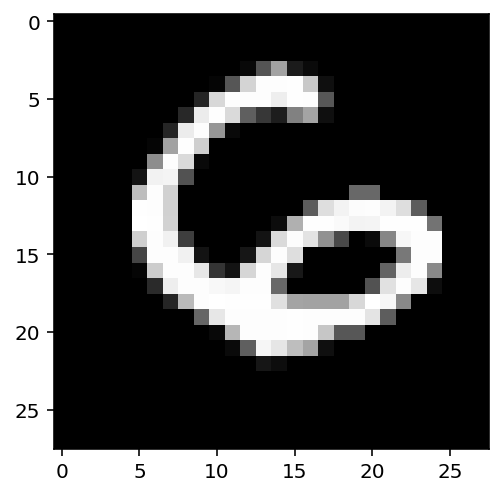

In [15]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [0]:
def sigmoid_activation(x):
  return 1/(1 + torch.exp(-x))
inputs = images.view(images.shape[0], -1)
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

output1 = sigmoid_activation(torch.mm(inputs, w1) + b1)
output2 = torch.mm(output1, w2) + b2

In [17]:
def softmax_activation(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)
probabilities = softmax_activation(output2)
print(probabilities.shape)

torch.Size([64, 10])
